This section contains the code used to generate figures in a Jupyter notebook.  
All analyses were performed using MicrobiomeAnalyst.

To conduct the analysis in MicrobiomeAnalyst, the following four input files were used:

- `asv.csv`  
- `meta.csv`  
  *(both generated in Step 5)*  
- `taxa_silva_rev.csv`  
- `tree.nwk`  
  *(both derived from QIIME2 outputs)*

The results were saved separately based on taxonomic level:  
- **Genus-level analysis**: `genus_analysis_250609.xlsx`  
- **Phylum-level analysis**: `phylum_analysis_250609.xlsx`

In [74]:
import pandas as pd
import matplotlib.colors as colors

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Arial'

import warnings
warnings.filterwarnings("ignore")

In [75]:
# The sequence data were processed using QIIME 2 to generate ASV and metadata files.
# These outputs were then uploaded to MicrobiomeAnalyst for downstream analysis.

# Genus
# Taxa abund, lefse

In [76]:
cmap1 = colors.ListedColormap([
    '#fb8072',
    '#fdb462',
    '#ffed6f',
    '#b3de69',
    '#ccebc5',
    '#8dd3c7',
    '#80b1d3',
    '#a6cee3',
    '#bebada',
    '#bc80bd',
    '#fccde5',
    '#fdcdac',
    '#e5c494',
    '#d9d9d9',
    '#b3b3b3',
])


cmap2 = colors.ListedColormap([
    '#fdb462',
    '#fb8072',
    '#c5b0d5',
    '#b3de69',
    '#d4efdf',
    '#ffed6f',
    '#ccebc5',
    '#fccde5',
    '#fae3d9',
    '#fdcdac',
    '#c7ecee',
    '#8dd3c7',
    '#e6ccb2',
    '#d9d9d9',
    '#b3b3b3',
])


In [ ]:
# Genus
# Figure S2
# Btype

df_g_tax_b = pd.read_excel('./Data/MicrobiomeAnalyst/genus_analysis_250609.xlsx', sheet_name='B_type_genus')
df_g_tax_b= df_g_tax_b.set_index('features').T
df_g_tax_b.head(2)

features,Bifidobacterium,Weissella,Bacteroides,Faecalibacterium,Blautia,Escherichia_Shigella,Eubacterium_hallii_group,Anaerostipes,Megamonas,Fusicatenibacter,f_Lachnospiraceae;g_NA,Subdoligranulum,Lachnoclostridium,Parabacteroides,Others
Control,6.038285,0.088665,23.311963,0.225072,9.778111,7.170463,1.607330,1.723276,0.704770,1.032147,4.758332,1.234484,1.780112,4.062656,36.484336
Artichoke,18.196294,13.092131,9.799195,7.408554,6.970675,4.790128,3.801583,3.348224,2.456986,2.437083,2.200451,1.842187,1.304790,1.059313,21.292406


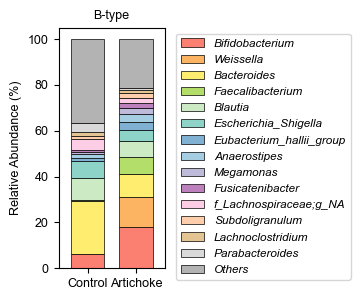

In [ ]:
# Genus
# Figure S2
# Btype

df_g_tax_b.plot(kind='bar', stacked=True,figsize=(3.8, 3.1), colormap=cmap1, edgecolor='k', linewidth=0.5, width=0.7)
plt.xticks(rotation=0, fontsize=9)
plt.yticks(fontsize=9)
plt.ylabel('Relative Abundance (%)', fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=9, prop={'style': 'italic', 'size':8.5})
plt.title('B-type', fontsize=9)
plt.tight_layout()
plt.savefig('./output_figure/genus_abundance_Btype.png', dpi=600)
plt.show()

In [ ]:
# Genus
# Figure S2
# Ptype

df_g_tax_p = pd.read_excel('./Data/MicrobiomeAnalyst/genus_analysis_250609.xlsx', sheet_name='P_type_genus')
df_g_tax_p = df_g_tax_p.set_index('features').T
df_g_tax_p.head(2)

features,Weissella,Bifidobacterium,Megasphaera,Faecalibacterium,Prevotella,Bacteroides,Blautia,f_Enterobacteriaceae;g_NA,Dorea,Subdoligranulum,Holdemanella,Escherichia_Shigella,Coprococcus,Parabacteroides,Others
Control,0.018857,2.578729,2.234584,0.551575,1.367151,17.749387,7.495757,5.633604,4.398454,1.635866,1.800867,10.729776,4.304167,6.727324,32.773902
Artichoke,17.247812,12.752632,7.648914,6.187536,5.601208,4.766135,4.317505,3.175943,2.669569,2.669569,2.505219,1.723449,1.208191,0.399769,27.126549


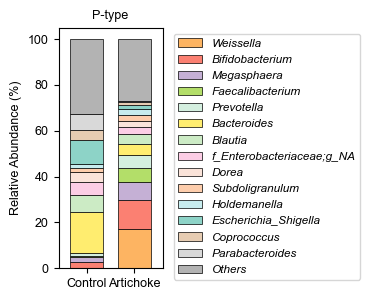

In [ ]:
# Genus
# Figure S2
# Ptype


df_g_tax_p.plot(kind='bar', stacked=True,figsize=(3.9, 3.1), colormap=cmap2, edgecolor='k', linewidth=0.5, width=0.7)
plt.xticks(rotation=0, fontsize=9)
plt.yticks(fontsize=9)
plt.ylabel('Relative Abundance (%)', fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=9, prop={'style': 'italic', 'size':8.5})
plt.title('P-type', fontsize=9)

plt.tight_layout()
plt.savefig('./output_figure/phylum_abundance_Ptype.png', dpi=600)
plt.show()

In [ ]:
# Genus
# lefse
# Figure 3C
# Btype


orders = ['Control', 'Artichoke']
g_colors = [ 'firebrick', 'lightcoral']

df_lefse = pd.read_excel('./Data/MicrobiomeAnalyst/genus_analysis_250609.xlsx', sheet_name='B_type_lefse')
df_lefse.head(2)

,features,Pvalues,Control,Artichoke,LDAscore,FDR
0,Weissella,0.000026,887.68,130930.0,4.81,0.000403
1,Bifidobacterium,0.000658,60487.00,182050.0,4.78,0.005157


In [ ]:
data = df_lefse[df_lefse.FDR < 0.05]
data = data[abs(data.LDAscore) > 3.0]
data = data.sort_values(by='LDAscore', ascending=False)

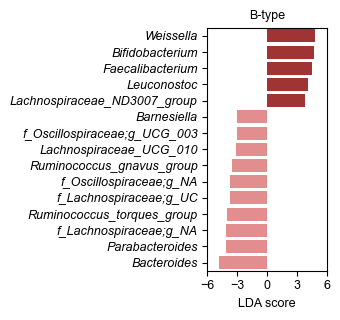

In [122]:
plt.figure(figsize=(3.5, 3.3))
colors = ['firebrick'] * 5 +  ['lightcoral'] * 11
sns.barplot(x='LDAscore', y='features', data=data, palette=colors)
plt.xlabel('LDA score', fontsize=9)
plt.yticks(fontsize=9, fontstyle='italic')
plt.ylabel('')
plt.xticks([-6, -3, 0, 3, 6], fontsize=9)
plt.title('B-type', fontsize=9)
plt.tight_layout()

plt.savefig('./output_figure/lefse_genus_Btype.png', dpi=600)
plt.show()


In [ ]:
# Genus
# lefse
# Figure 3D
# Ptype

orders = ['Control', 'Artichoke']
g_colors = [ 'lightcoral', 'lightseagreen']

df_lefse = pd.read_excel('./Data/MicrobiomeAnalyst/genus_analysis_250609.xlsx', sheet_name='P_type_lefse')
df_lefse.head(2)

,features,Control,Artichoke,LDAscore,LDA,Pvalues,FDR
0,Weissella,182.4,171850.0,4.93,4.93,0.003346,0.049069
1,Faecalibacterium,5932.0,62071.0,4.45,4.45,0.005587,0.049170


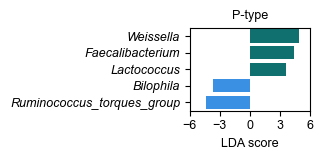

In [ ]:
# Genus
# lefse
# Figure 3D
# Ptype


data = df_lefse[df_lefse.FDR < 0.05]
data = data[abs(data.LDAscore) > 3.0]
data = data.sort_values(by='LDAscore', ascending=False)

plt.figure(figsize=(3.33, 1.7))
colors = ['teal'] * 3 +  ['dodgerblue'] * 2
sns.barplot(x='LDAscore', y='features', data=data, palette=colors)

plt.xlabel('LDA score', fontsize=9)
plt.yticks(fontsize=9, fontstyle='italic')
plt.ylabel('')
plt.xticks([-6, -3, 0, 3, 6], fontsize=9)
plt.title('P-type', fontsize=9)

plt.tight_layout()

plt.savefig('./output_figure/lefse_genus_Ptype.png', dpi=600)
plt.show()


In [ ]:
# abundacne phylum

# B-type
df_ac_b = pd.read_excel('./Data/MicrobiomeAnalyst/genus_analysis_250609.xlsx', sheet_name='B_type_genus_sample_rel')
df_ac_b= df_ac_b.set_index('features')
# df_ac_b.head()

# P-type
df_ac_p = pd.read_excel('./Data/MicrobiomeAnalyst/genus_analysis_250609.xlsx', sheet_name='P_type_genus_sample_rel')
df_ac_p= df_ac_p.set_index('features')
df_ac_p.head()

,Acidaminococcus,Acinetobacter,Agathobacter,Alistipes,Allisonella,Anaerostipes,Anaerovibrio,Bacteroides,Bifidobacterium,Bilophila,...,Senegalimassilia,Streptococcus,Subdoligranulum,Succiniclasticum,Sutterella,Turicibacter,Tyzzerella,Veillonella,Weissella,class
features,,,,,,,,,,,,,,,,,,,,,
Sub005.1P.G11,0.665004,0.0,0.554170,0.000000,0.609587,1.274591,0.581879,1.745636,0.000000,1.246883,...,0.000000,0.387919,0.858964,0.000000,0.969798,0.110834,0.000000,0.0,0.055417,Control
Sub014.1P.G11,0.984313,0.0,0.307598,0.246078,0.092279,0.246078,0.000000,12.365426,5.136881,0.338357,...,0.184559,0.092279,1.384189,0.000000,0.584436,0.000000,0.000000,0.0,0.000000,Control
Sub022.1P.G11,0.000000,0.0,1.215559,0.054025,0.000000,0.324149,0.000000,29.146407,2.512156,1.728795,...,0.243112,0.108050,3.565640,2.052944,0.405186,0.000000,0.135062,0.0,0.054025,Control
Sub019.1P.G11,0.000000,0.0,0.000000,0.233100,0.087413,0.000000,0.000000,22.406760,2.884615,0.874126,...,0.000000,0.000000,0.000000,0.000000,0.233100,0.000000,0.000000,0.0,0.000000,Control
Sub025.1P.G11,0.196024,0.0,4.116494,0.196024,0.420050,0.952114,0.000000,26.967236,2.660319,0.952114,...,0.000000,1.008121,2.604313,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,Control


In [ ]:
# Weissella
# Figure 3E

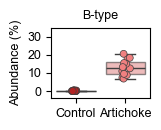

In [171]:
# Weissella
# B-type
# Figure 3E

feat = 'Weissella'
orders = ['Control', 'Artichoke']
g_colors = [ 'firebrick', 'lightcoral',]

data = df_ac_b

plt.figure(figsize=(1.7, 1.4))
sns.stripplot(data=data, x='class', y=feat, jitter=True, edgecolor='gray', linewidth=0.5, palette=g_colors, order=orders)

ax = sns.boxplot(data=data, x='class', y=feat, order=orders, palette=g_colors, showfliers=False)
for patch in ax.patches:
    patch.set_alpha(0.6)  

plt.title('B-type', fontsize=9)
plt.xlabel('')
plt.ylabel('Abundance (%)', fontsize=9)
plt.xticks(rotation=0, fontsize=9)
plt.yticks([0, 10, 20, 30], fontsize=9)

plt.ylim(-4, 35)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('./output_figure/Weissella_Btype.png', dpi=600)

plt.show()

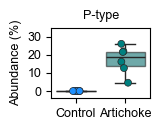

In [ ]:
# Weissella
# P-type
# Figure 3E

feat = 'Weissella'
orders = ['Control', 'Artichoke']
g_colors = [ 'dodgerblue', 'teal',]

data = df_ac_p

plt.figure(figsize=(1.7, 1.4))
sns.stripplot(data=data, x='class', y=feat, jitter=True, edgecolor='gray', linewidth=0.5, palette=g_colors, order=orders)

ax = sns.boxplot(data=data, x='class', y=feat, order=orders, palette=g_colors, showfliers=False)
for patch in ax.patches:
    patch.set_alpha(0.6)  

plt.title('P-type', fontsize=9)
plt.xlabel('')
plt.ylabel('Abundance (%)', fontsize=9)
plt.xticks(rotation=0, fontsize=9)
plt.ylim(-4, 35)
plt.yticks([0, 10, 20, 30], fontsize=9)
plt.tight_layout()
plt.savefig('./output_figure/Weissella_Ptype.png', dpi=600)

plt.show()

In [ ]:
# Faecalibacterium
# Figure 3F

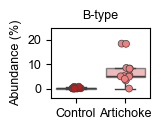

In [ ]:
# Faecalibacterium
# B-type
# Figure 3F

feat = 'Faecalibacterium'
orders = ['Control', 'Artichoke']
g_colors = [ 'firebrick', 'lightcoral',]

data = df_ac_b

plt.figure(figsize=(1.7, 1.4))
sns.stripplot(data=data, x='class', y=feat, jitter=True, edgecolor='gray', linewidth=0.5, palette=g_colors, order=orders)

ax = sns.boxplot(data=data, x='class', y=feat, order=orders, palette=g_colors, showfliers=False)
for patch in ax.patches:
    patch.set_alpha(0.6)  

plt.title('B-type', fontsize=9)
plt.xlabel('')
plt.ylabel('Abundance (%)', fontsize=9)
plt.xticks(rotation=0, fontsize=9)
plt.yticks([0, 10, 20, 30], fontsize=9)

plt.ylim(-4, 25)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('./output_figure/Faecalibacterium_Btype.png', dpi=600)

plt.show()

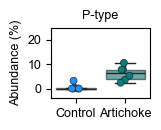

In [ ]:
# Faecalibacterium
# P-type
# Figure 3F

feat = 'Faecalibacterium'
orders = ['Control', 'Artichoke']
g_colors = [ 'dodgerblue', 'teal',]

data = df_ac_p

plt.figure(figsize=(1.7, 1.4))
sns.stripplot(data=data, x='class', y=feat, jitter=True, edgecolor='gray', linewidth=0.5, palette=g_colors, order=orders)

ax = sns.boxplot(data=data, x='class', y=feat, order=orders, palette=g_colors, showfliers=False)
for patch in ax.patches:
    patch.set_alpha(0.6)  

plt.title('P-type', fontsize=9)
plt.xlabel('')
plt.ylabel('Abundance (%)', fontsize=9)
plt.xticks(rotation=0, fontsize=9)
plt.yticks([0, 10, 20, 30], fontsize=9)
plt.ylim(-4, 25)

plt.tight_layout()
plt.savefig('./output_figure/Faecalibacterium_Ptype.png', dpi=600)

plt.show()

In [ ]:
# Ruminococcus_torques_group
# Figure 3G

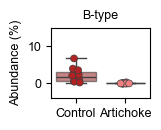

In [ ]:
# Ruminococcus_torques_group
# B-type
# Figure 3G

feat = 'Ruminococcus_torques_group'
orders = ['Control', 'Artichoke']
g_colors = [ 'firebrick', 'lightcoral',]

data = df_ac_b

plt.figure(figsize=(1.7, 1.4))
sns.stripplot(data=data, x='class', y=feat, jitter=True, edgecolor='gray', linewidth=0.5, palette=g_colors, order=orders)

ax = sns.boxplot(data=data, x='class', y=feat, order=orders, palette=g_colors, showfliers=False)
for patch in ax.patches:
    patch.set_alpha(0.6)  

plt.title('B-type', fontsize=9)
plt.xlabel('')
plt.ylabel('Abundance (%)', fontsize=9)
plt.xticks(rotation=0, fontsize=9)
plt.yticks([0, 10, 20, 30], fontsize=9)

plt.ylim(-4, 15)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('./output_figure/Ruminococcus_torques_group_Btype.png', dpi=600)

plt.show()

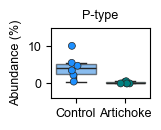

In [ ]:
# Ruminococcus_torques_group
# P-type
# Figure 3G

feat = 'Ruminococcus_torques_group'
orders = ['Control', 'Artichoke']
g_colors = [ 'dodgerblue', 'teal',]

data = df_ac_p

plt.figure(figsize=(1.7, 1.4))
sns.stripplot(data=data, x='class', y=feat, jitter=True, edgecolor='gray', linewidth=0.5, palette=g_colors, order=orders)

ax = sns.boxplot(data=data, x='class', y=feat, order=orders, palette=g_colors, showfliers=False)
for patch in ax.patches:
    patch.set_alpha(0.6)  

plt.title('P-type', fontsize=9)
plt.xlabel('')
plt.ylabel('Abundance (%)', fontsize=9)
plt.xticks(rotation=0, fontsize=9)
plt.yticks([0, 10, 20, 30], fontsize=9)
plt.ylim(-4, 15)

plt.tight_layout()
plt.savefig('./output_figure/Ruminococcus_torques_group_Ptype.png', dpi=600)

plt.show()

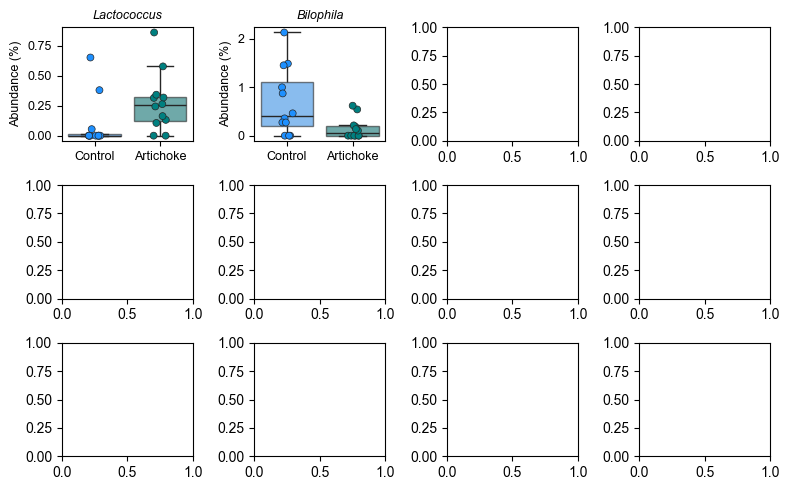

In [ ]:
# P-type specific genus 
# Figure S4


feats = [
    'Lactococcus' , 'Bilophila', ]

orders = ['Control', 'Artichoke']
g_colors = [ 'dodgerblue', 'teal',]
data = df_ac_b

fig, axes = plt.subplots(3, 4, figsize=(8, 5))
axes = axes.flatten()

for i, feat in enumerate(feats):
    ax = axes[i]
    sns.stripplot(
        data=data, x='class', y=feat,
        jitter=True, edgecolor='gray', linewidth=0.5,
        palette=g_colors, order=orders, ax=ax
    )
    sns.boxplot(
        data=data, x='class', y=feat,
        order=orders, palette=g_colors,
        showfliers=False, ax=ax
    )
    for patch in ax.patches:
        patch.set_alpha(0.6)
    
    ax.set_title(feat, fontsize=9, fontstyle='italic')
    ax.set_xlabel('',)
    ax.set_ylabel('Abundance (%)', fontsize=9)
    ax.tick_params(axis='x', labelrotation=0, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    # ax.set_ylim(-4, 15)



plt.tight_layout()
plt.savefig('./output_figure/multiple_Ptype_plots.png', dpi=600)
plt.show()


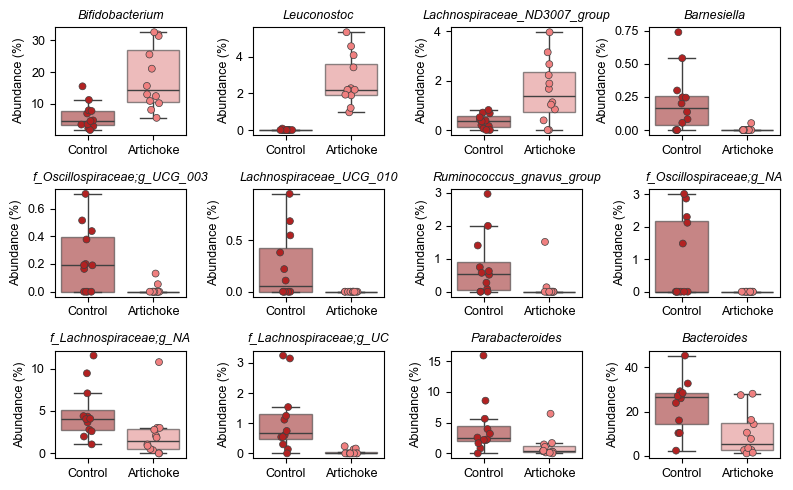

In [ ]:
# B-type specific genus 
# Figure S3

feats = [
    'Bifidobacterium',  'Leuconostoc',  'Lachnospiraceae_ND3007_group', 'Barnesiella',
    'f_Oscillospiraceae;g_UCG_003', 'Lachnospiraceae_UCG_010', 'Ruminococcus_gnavus_group', 'f_Oscillospiraceae;g_NA',
    'f_Lachnospiraceae;g_NA', 'f_Lachnospiraceae;g_UC', 'Parabacteroides','Bacteroides' ]

orders = ['Control', 'Artichoke']
g_colors = [ 'firebrick', 'lightcoral',]
data = df_ac_b

fig, axes = plt.subplots(3, 4, figsize=(8, 5))
axes = axes.flatten()

for i, feat in enumerate(feats):
    ax = axes[i]
    sns.stripplot(
        data=data, x='class', y=feat,
        jitter=True, edgecolor='gray', linewidth=0.5,
        palette=g_colors, order=orders, ax=ax
    )
    sns.boxplot(
        data=data, x='class', y=feat,
        order=orders, palette=g_colors,
        showfliers=False, ax=ax
    )
    for patch in ax.patches:
        patch.set_alpha(0.6)
    
    ax.set_title(feat, fontsize=9, fontstyle='italic')
    ax.set_xlabel('',)
    ax.set_ylabel('Abundance (%)', fontsize=9)
    ax.tick_params(axis='x', labelrotation=0, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    # ax.set_ylim(-4, 15)



plt.tight_layout()
plt.savefig('./output_figure/multiple_Btype_plots.png', dpi=600)
plt.show()


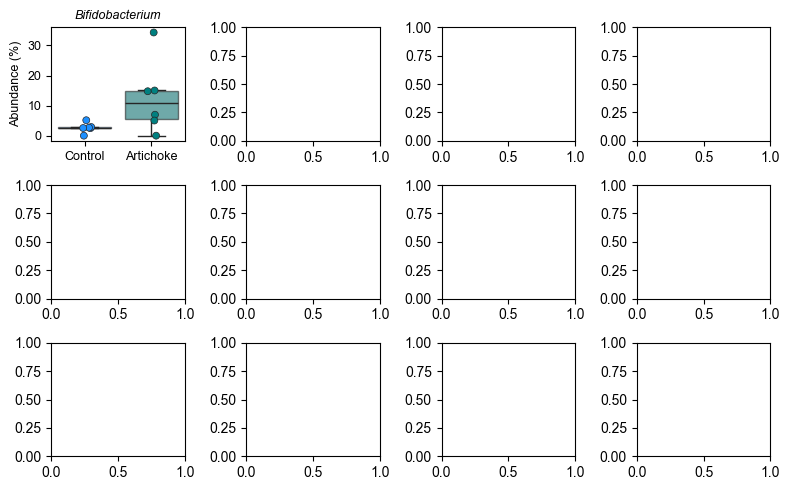

In [ ]:
# P-type Bifidobacterium genus 
# Figure S5


feats = [
    'Bifidobacterium']

orders = ['Control', 'Artichoke']
g_colors = [ 'dodgerblue', 'teal',]
data = df_ac_p

fig, axes = plt.subplots(3, 4, figsize=(8, 5))
axes = axes.flatten()

for i, feat in enumerate(feats):
    ax = axes[i]
    sns.stripplot(
        data=data, x='class', y=feat,
        jitter=True, edgecolor='gray', linewidth=0.5,
        palette=g_colors, order=orders, ax=ax
    )
    sns.boxplot(
        data=data, x='class', y=feat,
        order=orders, palette=g_colors,
        showfliers=False, ax=ax
    )
    for patch in ax.patches:
        patch.set_alpha(0.6)
    
    ax.set_title(feat, fontsize=9, fontstyle='italic')
    ax.set_xlabel('',)
    ax.set_ylabel('Abundance (%)', fontsize=9)
    ax.tick_params(axis='x', labelrotation=0, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    # ax.set_ylim(-4, 15)



plt.tight_layout()
plt.savefig('./output_figure/bifidobacterium_plots.png', dpi=600)
plt.show()
